In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Датасет содержит информацию о 800 покемонах из одноименной серии игр.

Особенности датасета:

1. Данные изначально искусственно сгенерированы разработчиками игр, поэтому в них отсутствуют выбросы данных.
2. Распределения признаков не соответствуют нормальному. Это делает непременимым ряд стат. тестов, однако далее будет показано, что все равно есть простор для анализа.



---


**Какой анализ осуществлен в данном проекте:**

1. Визуализация данных с помощью гистограмм и KDE.
2. Расчет матрицы корреляций.
3. Нормализация данных.
4. Проверка на нормальность с помощью QQ plot метода.
5. Тест хи-квадрат
6. Проверка биномиальной гипотезы.

**Содержание датасета:**

0. Name: Имя покемона
1. Type 1: Тип покемона
2. Type 2: Некоторые покемоны имеют 2 типа
3. Total: Сумма всех характеристик, которые следуют за этим, общее руководство о том, насколько силен покемон
4. HP: Здоровье, определяет, какой урон покемон может выдержать, прежде чем упадет в обморок
5. Attack: Базовый модификатор для обычных атак (например. Царапина, удар)
6. Defense: Базовая устойчивость к урону при обычных атаках
7. SP Atk: Специальная атака, базовый модификатор для специальных атак (например, огненный взрыв, пузырьковый луч)
8. SP Def: Базовая устойчивость к урону от специальных атак
9. Speed: Определяет, какой покемон атакует первым в каждом раунде
10. Generation: Поколение покемона
11. Legendary: Легендарность


# Визуализация данных

In [14]:
url = 'https://raw.githubusercontent.com/qNikitaMolodec/pokemon-analysis/main/Pokemon.csv'
data = pd.read_csv(url)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [15]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Визиализируем данные

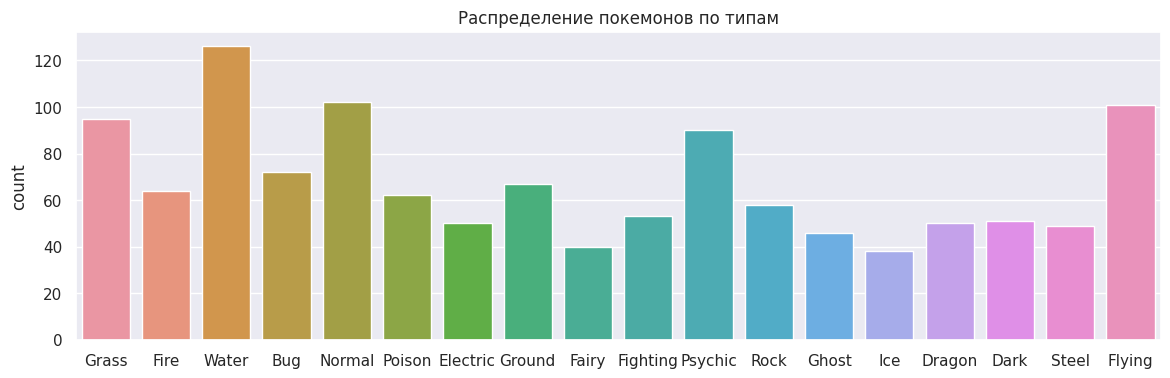

In [16]:
plt.figure(figsize=(14, 4))

#pd.concat - объединение датафреймов
Types = pd.concat([data["Type 1"], data["Type 2"]], axis=0)

sns.set(style='darkgrid', palette="dark")
sns.countplot(x = Types)

plt.title('Распределение покемонов по типам')
plt.show()

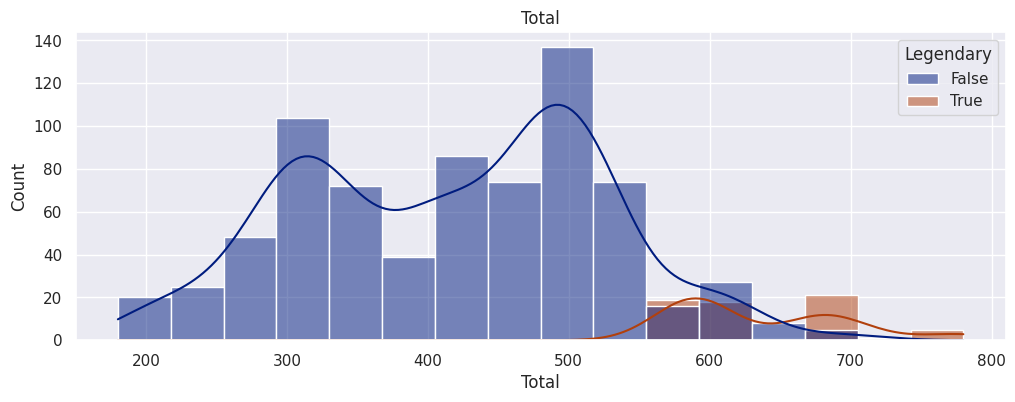

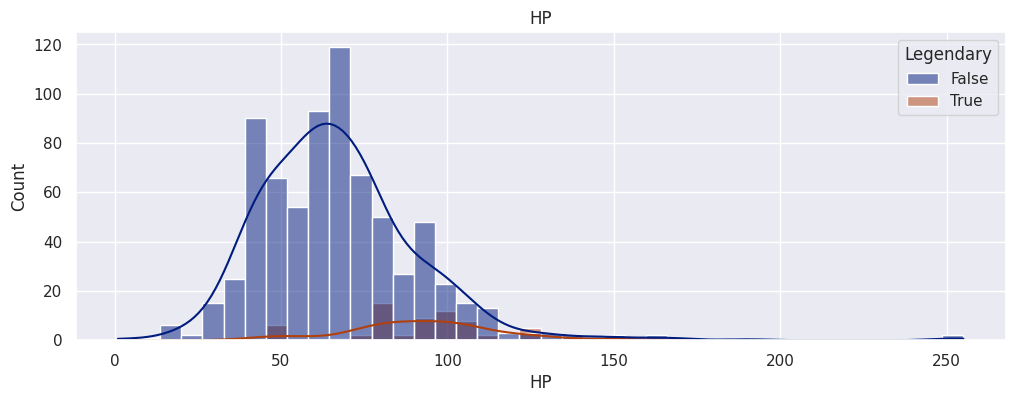

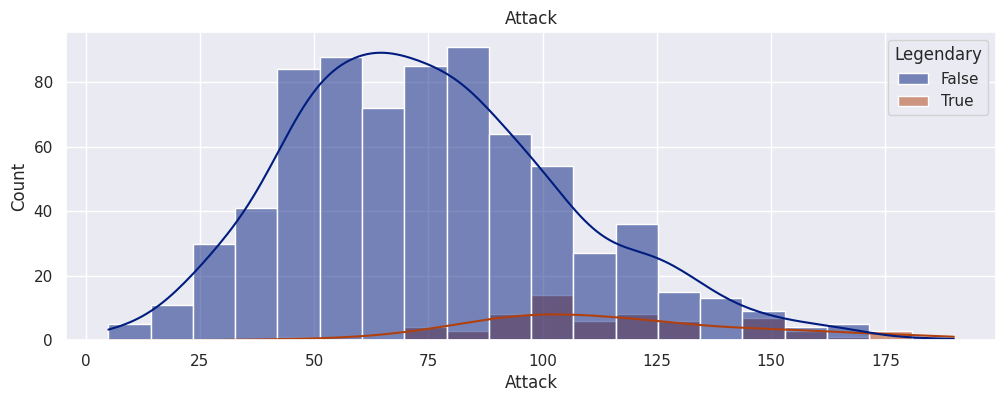

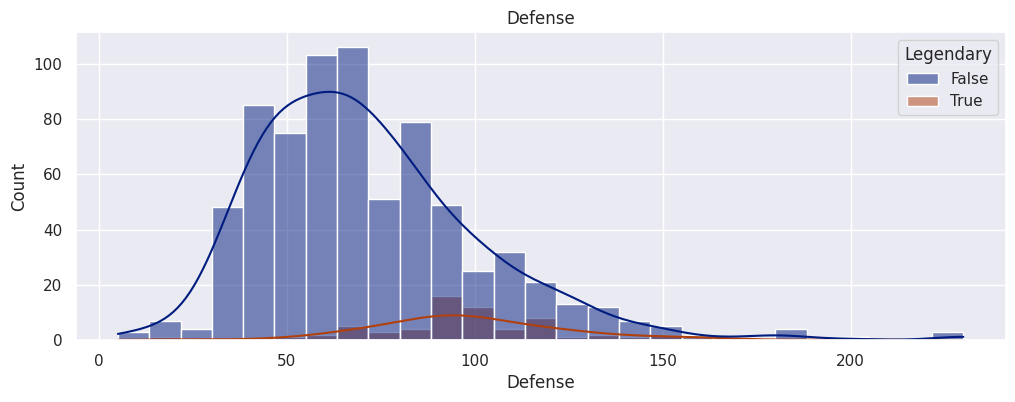

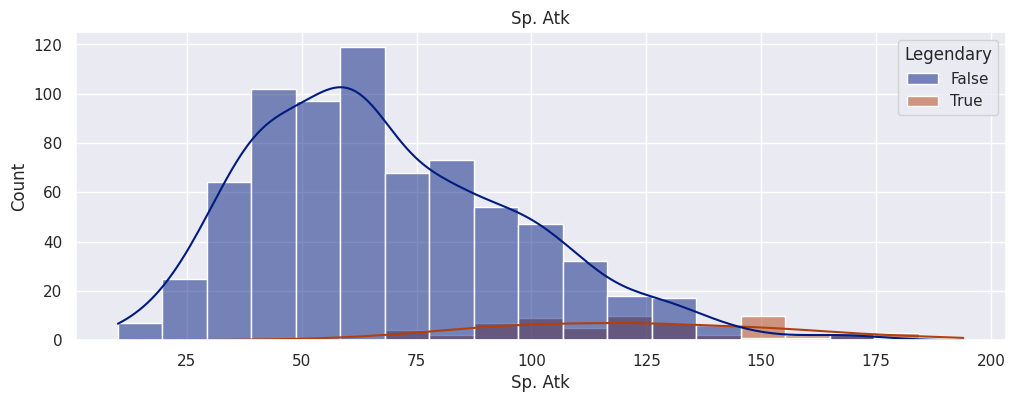

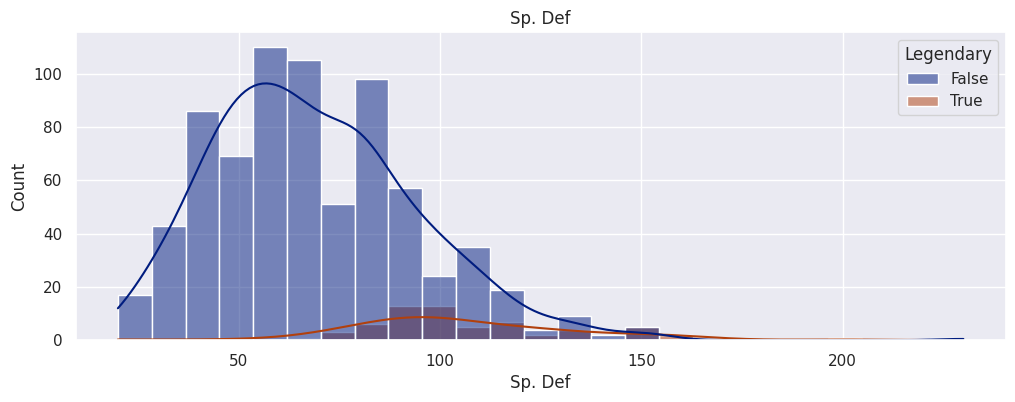

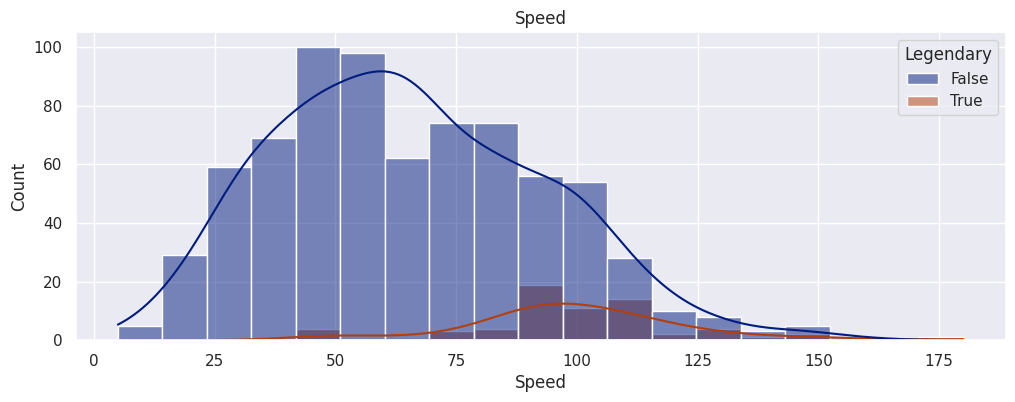

In [17]:
for i in ["Total", 'HP','Attack', 'Defense', "Sp. Atk", "Sp. Def", 'Speed']:
    plt.figure(figsize=(12, 4))
    sns.histplot(data=data, x=i, kde=True, hue="Legendary")
    plt.title(i)
    plt.show()

Какие выводы мы можем сделать из этих графиков?

1. KDE "на глаз" не похожи на функции распределения нормального распределения. Далее мы проверим этот факт.
2. Наблюдается смещение характеристик "легендарных" покемонов вправо относительно обычных, т.е. можно сказать, что они лучше по характеристикам (опустим "вайфу фактор").
3. График для Total имеет два пика - распределение *мультимодально*.

# Корреляции признаков
Проанализируем корреляции между характеристиками.

In [18]:
# Выброс лишних столбцов
data = data.drop(["#"], axis = 1)

<ipython-input-19-652fbba395e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)


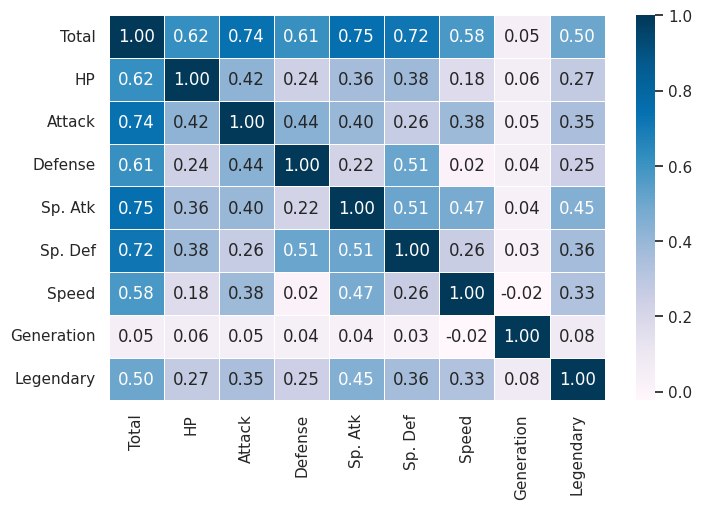

In [19]:
# Матрица со значениями коэффициента корреляции
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

Можно видеть, что параметр Total имеет высокие значения корреляции (более 0.5) для характеристик. По смыслу он является функцией от других параметров.

Также есть корреляции между "легендарностью" и другими характеристиками. Этот факт был отмечен при анализе графиков и проверен сейчас.

Попрактикуемся в стат. тестах.

Для начала проанализируем данные на нормальность.

# Ненормальность даннных.

Для этого построим вспомогательный график.

<ipython-input-20-c95a40fbcf1f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Water.loc[:, 'Attack'] = scaler.fit_transform(Water[['Attack']])
<ipython-input-20-c95a40fbcf1f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Psychic.loc[:, 'Attack'] = scaler.fit_transform(Psychic[['Attack']])


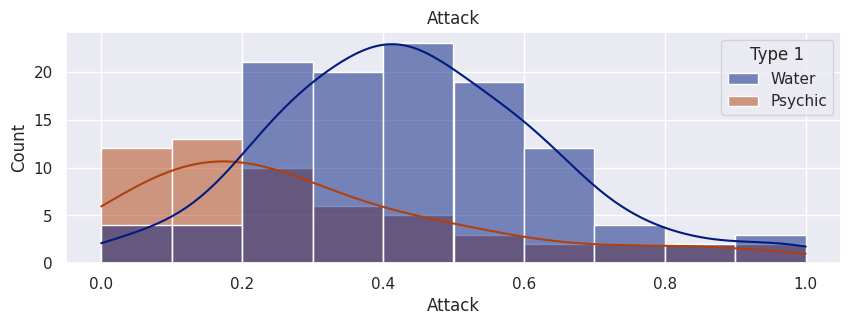

In [20]:
from sklearn import preprocessing

plt.figure(figsize=(10, 3))
Water = data[data["Type 1"] == "Water"]
Psychic = data[data["Type 1"] == "Psychic"]

# Инициализируем объект MinMaxScaler
scaler = preprocessing.MinMaxScaler()

X = "Sp. Def"

# Применяем нормализацию
Water.loc[:, 'Attack'] = scaler.fit_transform(Water[['Attack']])
Psychic.loc[:, 'Attack'] = scaler.fit_transform(Psychic[['Attack']])

sns.histplot(pd.concat([Water, Psychic], axis = 0), x='Attack', kde=True, hue="Type 1")
plt.title('Attack')
plt.show()

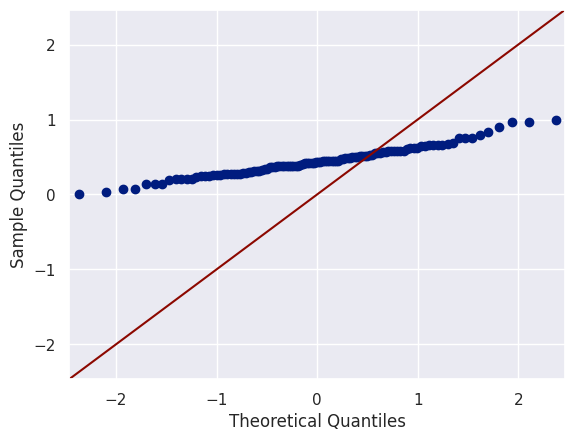

In [21]:
# Проверим данные на нормальность с помощью QQ теста
import statsmodels.api as sm
fig = sm.qqplot (Water["Attack"], line='45')

plt.show()

Нормальные данные должны ложиться на теоретическую кривую. Увы, но данные распределены не нормально, поэтому ряд тестов не имеет смысла применять. Аналогичный результат можно получить для других характеристик.

Однако можно выполнить тесты, не требующие нормальности.


# Тест Хи-квадрат

Проверим следующую гипотезу: количество покемонов в каждом поколении примерно одинаковое.
Альтернатива: кол-во покемонов по поколениям распределено не равномерно.

В данном методе необходимо разбиение множества значений случайной величины на интервалы. В нашем случае значение поколения принимает целые значения от 1 до 6 включительно - это и будут наши интервалы.

Далее необходимы теоретические и экспериментальные вероятности попадания с.в. в каждый из этих интервалов.

In [44]:
# Теоретическое распределение - равномерное
n_intervals = 6
uniform_probability = 1 / n_intervals
Exp_prob = [uniform_probability * 800] * n_intervals
print("Ожидаемые значения: ", Exp_prob)

# Наблюдаемые вероятности (observed)
Obs_prob = [((data['Generation'] == i).astype(int)).sum() for i in range(1,7)]
print("Наблюдаемые значения: ", Obs_prob)

stats.chisquare(f_obs=Obs_prob, f_exp=Exp_prob)

Ожидаемые значения:  [133.33333333333331, 133.33333333333331, 133.33333333333331, 133.33333333333331, 133.33333333333331, 133.33333333333331]
Наблюдаемые значения:  [166, 106, 160, 121, 165, 82]


Power_divergenceResult(statistic=47.36500000000001, pvalue=4.786657017412076e-09)

Итог: pvalue крайне мало, поэтому мы можем отвергнуть эту гипотезу

# Биномиальная гипотеза





Проверим следующую гипотезу H**: У любого покемона с высокой вероятностью не хватит "Атаки", чтобы нокаутировать другого такого же покемона, т.е. "Урон" > "HP" для любого покемона.**

Альтернатива K**: Нокаут с одного удара будет частым.**


Воспользуемся для проверки *биномиальным тестом*.

Его область задач: когда у нас есть некоторое предположение о том, как часто должно случаться событие, и мы хотим его проверить.

Данные: переменная, которая принимает два значения.



---


В оригинальной игре урон по покемону рассчитывается по нетривиальной формуле (см. картинку).

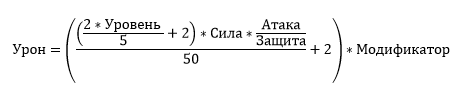

Для упрощения расчетов будем считать урон следующим образом: "Урон" = "Атака"/"Защита" * 10 (множитель 10 можно интерпретировать например как уровень покемона).


Приведем данные к нужному виду. Для этого создадим новый столбец, принимающий значение 1, когда "Урон" меньше "HP" и  в ином случае.


In [23]:
data["Damage_vs_HP"] = (data['Attack']/data['Defense'] * 20 - data['HP'] < 0).astype(int)

In [24]:
stats.binomtest((data['Damage_vs_HP']).sum(), data['Damage_vs_HP'].count(), p = 0.98)

BinomTestResult(k=786, n=800, alternative='two-sided', statistic=0.9825, pvalue=0.7053493541878915)

Как работает binomtest: функция принимает число успехов k, число всех испытаний n и вероятность, которую мы хотим проверить. В данном случае мы хотим узнать, будет ли урон превалировать над ХП. Для оценки мы взяли вероятность p = 0.98.

В статистике как правило принято брать уровень доверия 0.05. Если pvalue превышает это значение, то говорят, что гипотезу нельзя отвергнуть по данному уровню доверия.

В нашем случае pvalue >> 0.05 - это говорит о высокой уверенности в гипотезе.

Вывод: придуманная нами формула расчета урона, по всей видимости, плохо подходит для имеющихся характеристик.